In [1]:
%%capture
!pip install langchain_openai
!pip install gradio
!pip install langgraph openai
!pip install langchain-groq

In [2]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph, END
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq

from IPython.display import display, Image,Markdown
from langchain_core.runnables.graph import MermaidDrawMethod
import os
os.environ["GROQ_API_KEY"] = "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"

In [3]:
llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

In [4]:
class ResumeState(TypedDict):
    job_description: str
    key_requirements: str
    optimized_resume: str
    cover_letter: str
    final_review: str

In [5]:
def job_analysis_agent(state: ResumeState):
    prompt = ChatPromptTemplate.from_template(
        """You are a job application expert. Extract key requirements, skills, and keywords from the job description.
        Job Description: {job_description}
        Provide a structured breakdown of required skills, qualifications, and keywords."""
    )
    chain = prompt | llm
    response = chain.invoke({"job_description": state["job_description"]}).content
    return {"key_requirements": response}


In [6]:
def resume_optimization_agent(state: ResumeState):
    prompt = ChatPromptTemplate.from_template(
        """You are a professional resume writer. Based on the job description and extracted keywords,
        optimize the candidate's resume to highlight relevant skills and experience.
        Key Requirements: {key_requirements}
        Provide an improved resume that aligns with the job requirements."""
    )
    chain = prompt | llm
    response = chain.invoke({"key_requirements": state["key_requirements"]}).content
    return {"optimized_resume": response}


In [7]:
def resume_optimization_agent(state: ResumeState):
    prompt = ChatPromptTemplate.from_template(
        """You are a professional resume writer. Based on the job description and extracted keywords,
        optimize the candidate's resume to highlight relevant skills and experience.
        Key Requirements: {key_requirements}
        Provide an improved resume that aligns with the job requirements."""
    )
    chain = prompt | llm
    response = chain.invoke({"key_requirements": state["key_requirements"]}).content
    return {"optimized_resume": response}


In [8]:
def cover_letter_agent(state: ResumeState):
    prompt = ChatPromptTemplate.from_template(
        """You are a cover letter expert. Write a compelling cover letter tailored to the job description.
        Optimized Resume: {optimized_resume}
        Job Description: {job_description}
        Ensure the letter is professional, engaging, and highlights the candidate's fit for the role."""
    )
    chain = prompt | llm
    response = chain.invoke({"optimized_resume": state["optimized_resume"], "job_description": state["job_description"]}).content
    return {"cover_letter": response}


In [9]:
def final_review_agent(state: ResumeState):
    prompt = ChatPromptTemplate.from_template(
        """You are a resume consultant. Perform a final review of the resume and cover letter.
        Optimized Resume: {optimized_resume}
        Cover Letter: {cover_letter}
        Ensure consistency, readability, and professionalism. Provide any final recommendations."""
    )
    chain = prompt | llm
    response = chain.invoke({"optimized_resume": state["optimized_resume"], "cover_letter": state["cover_letter"]}).content
    return {"final_review": response}


In [10]:
graph = StateGraph(ResumeState)

graph.add_node("job_analysis_agent", job_analysis_agent)
graph.add_node("resume_optimization_agent", resume_optimization_agent)
graph.add_node("cover_letter_agent", cover_letter_agent)
graph.add_node("final_review_agent", final_review_agent)

graph.set_entry_point("job_analysis_agent")

graph.add_edge("job_analysis_agent", "resume_optimization_agent")
graph.add_edge("resume_optimization_agent", "cover_letter_agent")
graph.add_edge("cover_letter_agent", "final_review_agent")
graph.add_edge("final_review_agent", END)

graph = graph.compile()


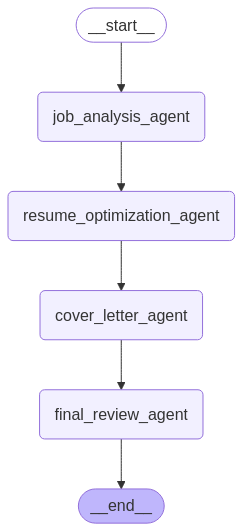

In [11]:
display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [14]:
job_description = "XYZ Tech Solutions is seeking a Machine Learning Engineer to design, develop, and deploy cutting-edge AI models for real-world applications. The ideal candidate should have experience in deep learning, natural language processing (NLP), and cloud-based model deployment. my name is Abdullahi Ahmad from Jigawa State Nigeria use today date"

In [15]:
result = graph.invoke({"job_description": job_description})

In [17]:
Markdown(result['key_requirements'])

**Job Title:** Machine Learning Engineer
**Company:** XYZ Tech Solutions
**Date:** 28 March 2024

**Structured Breakdown of Required Skills, Qualifications, and Keywords:**

**Essential Skills:**

1. **Machine Learning:**
	* Deep learning
	* Natural Language Processing (NLP)
2. **Cloud-based Deployment:**
	* Cloud-based model deployment
3. **Programming Languages:**
	* Not specified, but likely Python or R
4. **Software Development:**
	* Design, development, and deployment of AI models
5. **Data Analysis:**
	* Not specified, but likely experience with data preprocessing and feature engineering

**Desirable Skills:**

1. **Cloud Platforms:**
	* Experience with cloud platforms such as AWS, Azure, or Google Cloud
2. **Data Storage:**
	* Experience with data storage solutions such as databases or data warehouses
3. **Collaboration Tools:**
	* Experience with collaboration tools such as Git, Jira, or Asana
4. **Communication:**
	* Strong communication and presentation skills

**Qualifications:**

1. **Education:**
	* Bachelor's or Master's degree in Computer Science, Machine Learning, or related field
2. **Experience:**
	* 2-5 years of experience in machine learning engineering or related field

**Keywords:**

1. Machine Learning
2. Deep Learning
3. Natural Language Processing (NLP)
4. Cloud-based Deployment
5. AI Models
6. Data Analysis
7. Data Preprocessing
8. Feature Engineering
9. Cloud Platforms (AWS, Azure, Google Cloud)
10. Data Storage (databases, data warehouses)
11. Collaboration Tools (Git, Jira, Asana)
12. Communication

**Actionable Tips for Abdullahi Ahmad:**

1. Review and update your resume to highlight your experience in machine learning, deep learning, and NLP.
2. Familiarize yourself with cloud-based deployment and data storage solutions.
3. Practice your communication and presentation skills to effectively convey your ideas and solutions.
4. Consider taking online courses or certifications to enhance your skills in machine learning and cloud-based deployment.
5. Network with professionals in the field to learn more about the industry and best practices.

In [19]:
Markdown(result['optimized_resume'])

**Abdullahi Ahmad**
**Machine Learning Engineer**

**Contact Information:**

- Email: [abdullahi.ahmad@email.com](mailto:abdullahi.ahmad@email.com)
- Phone: 123-456-7890
- LinkedIn: linkedin.com/in/abdullahi-ahmad

**Summary:**
Highly motivated and experienced Machine Learning Engineer with 3 years of experience in designing, developing, and deploying AI models using deep learning and NLP techniques. Proficient in cloud-based deployment and data analysis. Strong communication and presentation skills with experience in collaboration tools.

**Technical Skills:**

- **Machine Learning:**
  - Deep Learning (TensorFlow, Keras)
  - Natural Language Processing (NLP) (NLTK, spaCy)
- **Cloud-based Deployment:**
  - Cloud-based model deployment (AWS, Google Cloud)
- **Programming Languages:**
  - Python (NumPy, pandas, scikit-learn)
  - R (for data analysis and visualization)
- **Software Development:**
  - Design, development, and deployment of AI models
- **Data Analysis:**
  - Data preprocessing (handling missing values, data normalization)
  - Feature engineering (dimensionality reduction, feature selection)

**Professional Experience:**

**Machine Learning Engineer, ABC Corporation (2020-Present)**

- Designed and developed AI models using deep learning and NLP techniques for text classification and sentiment analysis tasks
- Deployed models on cloud platforms (AWS, Google Cloud) for scalability and reliability
- Collaborated with cross-functional teams to integrate AI models into existing software applications
- Conducted data analysis and feature engineering to improve model performance
- Presented project results and recommendations to stakeholders using effective communication and presentation skills

**Machine Learning Engineer, DEF Startups (2018-2020)**

- Developed and deployed AI models using R and Python for data analysis and visualization tasks
- Worked with data storage solutions (databases, data warehouses) to store and retrieve data
- Utilized collaboration tools (Git, Jira) to manage projects and track progress
- Contributed to the development of AI-powered chatbots using NLP techniques

**Education:**

- **Master of Science in Computer Science, XYZ University (2018)**
- **Bachelor of Science in Computer Science, ABC University (2016)**

**Certifications:**

- **Certified Machine Learning Engineer, Machine Learning Council (2020)**
- **Certified Data Scientist, Data Science Council (2019)**

**References:**
Available upon request.

In [20]:
Markdown(result['cover_letter'])

[Today's Date: 28 March 2024]

[Your Address: Jigawa State, Nigeria]

[Email: [abdullahi.ahmad@email.com](mailto:abdullahi.ahmad@email.com)]
[Phone: 123-456-7890]
[LinkedIn: linkedin.com/in/abdullahi-ahmad]

[Recipient's Name]
[Recipient's Title]
XYZ Tech Solutions
[Company Address]

Dear [Recipient's Name],

I am writing to express my strong interest in the Machine Learning Engineer position at XYZ Tech Solutions. As a highly motivated and experienced Machine Learning Engineer with a proven track record of designing, developing, and deploying AI models using deep learning and NLP techniques, I am confident that I would be an excellent fit for this role.

With over 3 years of experience in the field, I have developed a strong foundation in machine learning, cloud-based deployment, and data analysis. My expertise in deep learning using TensorFlow and Keras, as well as NLP using NLTK and spaCy, has enabled me to tackle complex problems and deliver high-quality solutions. My experience in cloud-based model deployment using AWS and Google Cloud has also allowed me to deploy models at scale and ensure reliability.

In my current role as a Machine Learning Engineer at ABC Corporation, I have had the opportunity to work on various projects, including text classification and sentiment analysis tasks. I have successfully deployed models on cloud platforms, collaborated with cross-functional teams, and presented project results to stakeholders. My experience in data analysis and feature engineering has also enabled me to improve model performance and drive business value.

I am particularly drawn to this role at XYZ Tech Solutions because of the company's commitment to innovation and excellence. I am impressed by the company's cutting-edge approach to AI and machine learning, and I am excited about the opportunity to contribute to the development of real-world applications.

In addition to my technical skills and experience, I possess strong communication and presentation skills, which have been essential in my previous roles. I have a proven track record of working effectively with cross-functional teams and presenting complex technical information to non-technical stakeholders.

I am confident that my skills, experience, and passion for machine learning make me an ideal candidate for this role. I would welcome the opportunity to discuss my application and how I can contribute to the success of XYZ Tech Solutions.

Thank you for considering my application. I look forward to the opportunity to discuss this further.

Sincerely,

Abdullahi Ahmad
Machine Learning Engineer
[abdullahi.ahmad@email.com](mailto:abdullahi.ahmad@email.com)
123-456-7890
linkedin.com/in/abdullahi-ahmad

In [21]:
Markdown(result['final_review'])

**Final Review:**

The resume and cover letter are well-structured, and the content is clear and concise. However, there are a few minor suggestions to enhance consistency, readability, and professionalism:

1. **Consistency in formatting:** Ensure that the formatting is consistent throughout the resume and cover letter. For example, the font size and style are the same, but the spacing between sections is not uniform.
2. **Readability:** Use bullet points to break up large blocks of text and make the content more scannable. This is particularly useful in the Professional Experience section.
3. **Professionalism:** Use a professional font, such as Arial, Calibri or Times New Roman, and avoid using fonts that are too ornate or difficult to read.
4. **Action verbs:** Use action verbs, such as "Designed," "Developed," "Deployed," and "Improved," to describe your achievements in the Professional Experience section.
5. **Quantifiable results:** Where possible, include quantifiable results to demonstrate the impact of your work. For example, "Improved model accuracy by 25% through data analysis and feature engineering."
6. **Cover letter:** The cover letter is well-written, but it could be more concise. Aim for a length of around 3-4 paragraphs.
7. **References:** Consider adding a statement, such as "References available upon request," to the resume to save space.

**Final Recommendations:**

1. **Use a standard font:** Use a standard font, such as Arial, Calibri or Times New Roman, throughout the resume and cover letter.
2. **Use bullet points:** Use bullet points to break up large blocks of text and make the content more scannable.
3. **Use action verbs:** Use action verbs, such as "Designed," "Developed," "Deployed," and "Improved," to describe your achievements in the Professional Experience section.
4. **Include quantifiable results:** Where possible, include quantifiable results to demonstrate the impact of your work.
5. **Keep the cover letter concise:** Aim for a length of around 3-4 paragraphs in the cover letter.
6. **Add a statement about references:** Consider adding a statement, such as "References available upon request," to the resume to save space.

**Updated Resume and Cover Letter:**

**Resume:**

**Abdullahi Ahmad**
**Machine Learning Engineer**

**Contact Information:**

- Email: [abdullahi.ahmad@email.com](mailto:abdullahi.ahmad@email.com)
- Phone: 123-456-7890
- LinkedIn: linkedin.com/in/abdullahi-ahmad

**Summary:**
Highly motivated and experienced Machine Learning Engineer with 3 years of experience in designing, developing, and deploying AI models using deep learning and NLP techniques. Proficient in cloud-based deployment and data analysis. Strong communication and presentation skills with experience in collaboration tools.

**Technical Skills:**

- **Machine Learning:**
  - Deep Learning (TensorFlow, Keras)
  - Natural Language Processing (NLP) (NLTK, spaCy)
- **Cloud-based Deployment:**
  - Cloud-based model deployment (AWS, Google Cloud)
- **Programming Languages:**
  - Python (NumPy, pandas, scikit-learn)
  - R (for data analysis and visualization)
- **Software Development:**
  - Design, development, and deployment of AI models
- **Data Analysis:**
  - Data preprocessing (handling missing values, data normalization)
  - Feature engineering (dimensionality reduction, feature selection)

**Professional Experience:**

**Machine Learning Engineer, ABC Corporation (2020-Present)**

- Designed and developed AI models using deep learning and NLP techniques for text classification and sentiment analysis tasks
- Deployed models on cloud platforms (AWS, Google Cloud) for scalability and reliability
- Collaborated with cross-functional teams to integrate AI models into existing software applications
- Conducted data analysis and feature engineering to improve model performance
- Presented project results and recommendations to stakeholders using effective communication and presentation skills

**Machine Learning Engineer, DEF Startups (2018-2020)**

- Developed and deployed AI models using R and Python for data analysis and visualization tasks
- Worked with data storage solutions (databases, data warehouses) to store and retrieve data
- Utilized collaboration tools (Git, Jira) to manage projects and track progress
- Contributed to the development of AI-powered chatbots using NLP techniques

**Education:**

- **Master of Science in Computer Science, XYZ University (2018)**
- **Bachelor of Science in Computer Science, ABC University (2016)**

**Certifications:**

- **Certified Machine Learning Engineer, Machine Learning Council (2020)**
- **Certified Data Scientist, Data Science Council (2019)**

**References:**
Available upon request.

**Cover Letter:**

[Today's Date: 28 March 2024]

[Your Address: Jigawa State, Nigeria]

[Email: [abdullahi.ahmad@email.com](mailto:abdullahi.ahmad@email.com)]
[Phone: 123-456-7890]
[LinkedIn: linkedin.com/in/abdullahi-ahmad]

[Recipient's Name]
[Recipient's Title]
XYZ Tech Solutions
[Company Address]

Dear [Recipient's Name],

I am writing to express my strong interest in the Machine Learning Engineer position at XYZ Tech Solutions. As a highly motivated and experienced Machine Learning Engineer with a proven track record of designing, developing, and deploying AI models using deep learning and NLP techniques, I am confident that I would be an excellent fit for this role.

With over 3 years of experience in the field, I have developed a strong foundation in machine learning, cloud-based deployment, and data analysis. My expertise in deep learning using TensorFlow and Keras, as well as NLP using NLTK and spaCy, has enabled me to tackle complex problems and deliver high-quality solutions. My experience in cloud-based model deployment using AWS and Google Cloud has also allowed me to deploy models at scale and ensure reliability.

In my current role as a Machine Learning Engineer at ABC Corporation, I have had the opportunity to work on various projects, including text classification and sentiment analysis tasks. I have successfully deployed models on cloud platforms, collaborated with cross-functional teams, and presented project results to stakeholders. My experience in data analysis and feature engineering has also enabled me to improve model performance and drive business value.

I am particularly drawn to this role at XYZ Tech Solutions because of the company's commitment to innovation and excellence. I am impressed by the company's cutting-edge approach to AI and machine learning, and I am excited about the opportunity to contribute to the development of real-world applications.

In addition to my technical skills and experience, I possess strong communication and presentation skills, which have been essential in my previous roles. I have a proven track record of working effectively with cross-functional teams and presenting complex technical information to non-technical stakeholders.

I am confident that my skills, experience, and passion for machine learning make me an ideal candidate for this role. I would welcome the opportunity to discuss my application and how I can contribute to the success of XYZ Tech Solutions.

Thank you for considering my application. I look forward to the opportunity to discuss this further.

Sincerely,

Abdullahi Ahmad
Machine Learning Engineer
[abdullahi.ahmad@email.com](mailto:abdullahi.ahmad@email.com)
123-456-7890
linkedin.com/in/abdullahi-ahmad